In [50]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 3.
# Climate models
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) netCDF file format / raster data
# (2) Visualization
# (3) Re-gridding
# (4) Multi-model ensembles

# We will work with datasets from CMIP6 archive; in the examples I will use the following cases:
#  ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc
#  ts_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc
#  ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc
#  ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc
# sono gli output di alcune simulazioni per il periodo storico 1850 - 2014

# You can download them either from the link provided in the slides, 
# or from the shared google drive link (login with your UNIMIB credentials only):
#  https://esgf-node.llnl.gov/search/cmip6/
#  https://drive.google.com/file/d/1ZEtDFYKhS_CEeYFzoe23vpDCIqR61bm5/view?usp=sharing

# Abbiamo visto nelle prime lezioni dati vettoriali, oggetti come poligoni ecc, serie storiche., in questo modulo vedremo un nuovo tipo di dato, in particolare dati di topo raster. grigliato, dati prodotti da simulazioni con modelli climatici che sono modelli di simulazione numerica.
# Il formato dati che si utilizza è quello netdCDF, formato dei dati prodotti da simulazioni climatiche.

In [51]:
# Exercise 1

# Explore and visualize climate model data in netCDF format

In [52]:
# Import libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs
#import cartopy.feature as cfeature

import xarray as xr
import nc_time_axis

import numpy as np


In [53]:
import matplotlib
print(matplotlib.get_cachedir())

C:\Users\loren\.matplotlib


In [54]:
print('matplotlib',mpl.__version__,'\n',
      'xarray',xr.__version__,'\n',
      'nc_time_axis',nc_time_axis.__version__,'\n',
      'numpy',np.__version__)

matplotlib 3.5.1 
 xarray 2022.3.0 
 nc_time_axis 1.4.0 
 numpy 1.21.5


In [55]:
# Choice of file (model)

#modfile='./ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
#modfile='./ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc'
modfile='./ts_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc'

#- extract model name dal nome del file
m_variable='./ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model=modfile[len(m_variable):-len(m_case)]

# Manipolazione file NetCDF

In [56]:
# EXPLORE NetCDF files with xarray, che è abbastanza simile a pandas

In [57]:
#- Open & explore the netCDF file
d1 = xr.open_dataset("C:/Users/loren/Desktop/ts_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc")  # è un dataset che corrisponde al dataframe in pandas
d1
# come coordinate abbiamo tempo, lat e long
# viene utilizzato il giorno centrale del mese per indicare il label del mese
# la variabile che a noi interessa è ts (temperatura superficiale, la sua distribuzione mese per mese dal 1850. I bnds definiscono invece la griglia)
# questi file anche degli attributi globali (o metadati) che sono stati generati/introdotti da chi ha generato questo file

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T03:52:25Z
    ...                     ...
    variable_id:            ts
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/0b38948e-85f7-4726-8f0b-291088a1cbef
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [58]:
#- Extract variable (ts)
#- Compare the structures: DataArray vs Dataset

# estraiamo una particolare variabile, viene tratta come data array
ts1 = d1.ts  # dunque la temperatura superficiale espressa in gradi kelvin
ts1

# griglia composta da 145 bande di latitudine e 192 bande di longitudine
# 1980 istanti di tempo

<xarray.DataArray 'ts' (time: 1980, lat: 145, lon: 192)>
[55123200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-15T03:52:23Z altered by CMOR: replaced missing va...

In [59]:
# Focus on the (horizontal) grid definition, e.g. the relation existing between "lat" and "lat_bnds" 

d1.lat_bnds  # sono i margini della griglia

<xarray.DataArray 'lat_bnds' (lat: 145, bnds: 2)>
array([[-90.   , -89.375],
       [-89.375, -88.125],
       [-88.125, -86.875],
       ...,
       [ 86.875,  88.125],
       [ 88.125,  89.375],
       [ 89.375,  90.   ]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Dimensions without coordinates: bnds

In [60]:
# Focus on the (horizontal) grid definition, e.g. the relation existing between "lat" and "lat_bnds" 

# sono i centroidi, ad esempio il secondo valore è un centroide infatti se prendo i margini della seconda cella sopra, -89.375, -88.125, e divido per due trovo correttamente il centroide -88.75 e cosi via per gli altri eccetto il primo centroide e l'ultimo che sono -90 e +90.

d1.lat

<xarray.DataArray 'lat' (lat: 145)>
array([-90.  , -88.75, -87.5 , -86.25, -85.  , -83.75, -82.5 , -81.25, -80.  ,
       -78.75, -77.5 , -76.25, -75.  , -73.75, -72.5 , -71.25, -70.  , -68.75,
       -67.5 , -66.25, -65.  , -63.75, -62.5 , -61.25, -60.  , -58.75, -57.5 ,
       -56.25, -55.  , -53.75, -52.5 , -51.25, -50.  , -48.75, -47.5 , -46.25,
       -45.  , -43.75, -42.5 , -41.25, -40.  , -38.75, -37.5 , -36.25, -35.  ,
       -33.75, -32.5 , -31.25, -30.  , -28.75, -27.5 , -26.25, -25.  , -23.75,
       -22.5 , -21.25, -20.  , -18.75, -17.5 , -16.25, -15.  , -13.75, -12.5 ,
       -11.25, -10.  ,  -8.75,  -7.5 ,  -6.25,  -5.  ,  -3.75,  -2.5 ,  -1.25,
         0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,  10.  ,
        11.25,  12.5 ,  13.75,  15.  ,  16.25,  17.5 ,  18.75,  20.  ,  21.25,
        22.5 ,  23.75,  25.  ,  26.25,  27.5 ,  28.75,  30.  ,  31.25,  32.5 ,
        33.75,  35.  ,  36.25,  37.5 ,  38.75,  40.  ,  41.25,  42.5 ,  43.75,
        45.  ,  46.25,  47.5 ,  48.75,  50.  ,  51.25,  52.5 ,  53.75,  55.  ,
        56.25,  57.5 ,  58.75,  60.  ,  61.25,  62.5 ,  63.75,  65.  ,  66.25,
        67.5 ,  68.75,  70.  ,  71.25,  72.5 ,  73.75,  75.  ,  76.25,  77.5 ,
        78.75,  80.  ,  81.25,  82.5 ,  83.75,  85.  ,  86.25,  87.5 ,  88.75,
        90.  ])
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude

In [61]:
# Focus on the (horizontal) grid definition, e.g. the relation existing between "lat" and "lat_bnds" 

# For instance, take "ACCESS-ESM1-5"
# The number of elements is the same along the lat dimension (145), meaning that each grid cell is 
#  identified (for the y-dimension) by the "centroid" rather than the "edges" of the grid cell.
# The "edges" of the grid cells are stored in lat_bnds.
# Note that the first and last elements of lat (the two poles) are an exception, because these particular
#  grid cells are identified not by the centroids, but by the outer edges!

###########################################################
# Different models might have differnt grid definitions !!!
###########################################################


# Visualizzazione grafica file NetCDF

In [62]:
# PLOT NetCDF data": overview

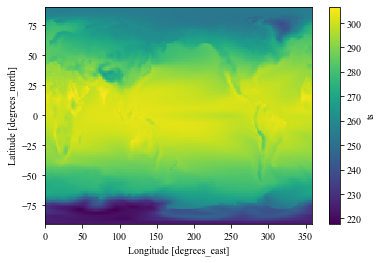

In [63]:
# Quick display

# possiamo visualizzare rapidamente anche questi file netcdf

import matplotlib.font_manager
import matplotlib
myfonts = "Times New Roman"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = myfonts


# abbiamo un oggetto tridemensionale
# viene riportata la media della var ts lungo al linea del tempo (quindi questo significa che ad esempio lat 5 long 10 c'è il valore medio di temperatura che c'è stata in tutti gli anni a disposzione)
# decido di comprimere la dimensione tempo calcolando la media

d1.ts.mean(axis=0).plot()

# si vedono in sottofondo il contorno dei continenti
# l'asse a destra va da 220 a 300 gradi kelvin

In [64]:
d1.ts

<xarray.DataArray 'ts' (time: 1980, lat: 145, lon: 192)>
array([[[243.86768, 243.86768, ..., 243.86768, 243.86768],
        [244.5398 , 244.57645, ..., 244.52673, 244.53418],
        ...,
        [242.1154 , 242.11617, ..., 242.10658, 242.1102 ],
        [240.80757, 240.80757, ..., 240.80757, 240.80757]],

       [[230.7976 , 230.7976 , ..., 230.7976 , 230.7976 ],
        [233.0221 , 232.98172, ..., 233.11049, 233.06535],
        ...,
        [243.10387, 243.10995, ..., 243.10306, 243.09885],
        [241.92432, 241.92432, ..., 241.92432, 241.92432]],

       ...,

       [[236.5558 , 236.5558 , ..., 236.5558 , 236.5558 ],
        [238.01506, 237.96507, ..., 238.10661, 238.0608 ],
        ...,
        [250.81908, 250.79305, ..., 250.89874, 250.86047],
        [250.61981, 250.61981, ..., 250.61981, 250.61981]],

       [[247.74689, 247.74689, ..., 247.74689, 247.74689],
        [248.99626, 248.98836, ..., 248.99207, 249.00397],
        ...,
        [248.44237, 248.5323 , ..., 248.26218, 248.35448],
        [246.77956, 246.77956, ..., 246.77956, 246.77956]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-15T03:52:23Z altered by CMOR: replaced missing va...

In [65]:
d1.ts.mean(axis=0)

<xarray.DataArray 'ts' (lat: 145, lon: 192)>
array([[222.62709, 222.62709, 222.62709, ..., 222.62709, 222.62709,
        222.62709],
       [224.9172 , 224.86653, 224.81544, ..., 225.07071, 225.01965,
        224.9694 ],
       [225.8525 , 225.71002, 225.56798, ..., 226.26718, 226.13382,
        225.99484],
       ...,
       [254.67621, 254.71143, 254.74643, ..., 254.5604 , 254.60478,
        254.63727],
       [254.36104, 254.37573, 254.38979, ..., 254.31363, 254.32564,
        254.34303],
       [253.8246 , 253.8246 , 253.8246 , ..., 253.8246 , 253.8246 ,
        253.8246 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

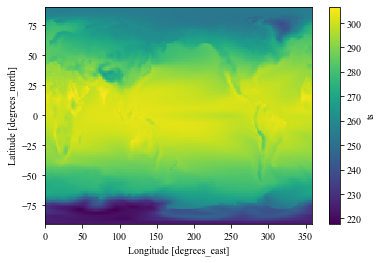

In [66]:
# Quick display
# Focus on the use of dimension names

# axis = 0 è equivalente a dim=time, otteniamo infatti la stessa cosa

d1.ts.mean(dim='time').plot()



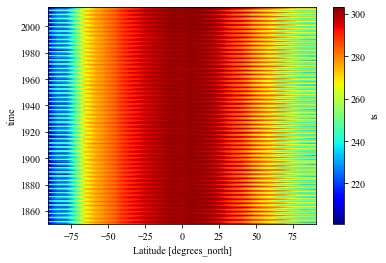

In [67]:
# Quick display

# possiamo plottare anche l'evoluzione nel tempo di qualcosa, ad esempio lat o long, evoluzione nel tempo di una variabile per bande di latitudine, dal polo sud a sx al polo nord a dx come variano le temperature

# abbiamo usato la dimensione longitudine per fare la media, ongni banda di latitudine rappresenta la media rispetto a tutte le longitudini


d1.ts.mean(dim='lon').plot(cmap='jet')

In [68]:
d1.ts.mean(dim='lon')

<xarray.DataArray 'ts' (time: 1980, lat: 145)>
array([[243.86768, 244.19292, 245.25403, ..., 240.94218, 241.22327,
        240.8076 ],
       [230.7976 , 232.00732, 234.24445, ..., 240.95973, 241.9403 ,
        241.92432],
       [215.50325, 217.56783, 221.00578, ..., 238.65495, 238.99141,
        238.40901],
       ...,
       [218.6648 , 221.08638, 224.0589 , ..., 255.70882, 254.85431,
        254.15974],
       [236.55583, 237.4646 , 238.86401, ..., 250.88354, 250.74059,
        250.61986],
       [247.74684, 248.12422, 248.93707, ..., 246.66388, 246.94789,
        246.77956]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0

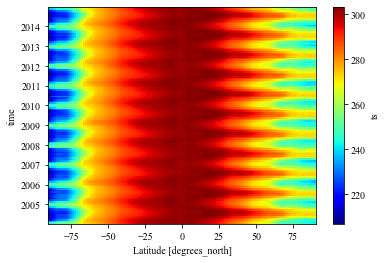

In [69]:
# facciamo uno zoom, sugli ultimi 10 anni, si usa la funzione sel

# Let's zoom in: focus on the last 10 years
# Example of dimension slicing in xarray (compare "sel" vs "isel")

# We can clearly see the alternation of the seasons!
# And also the asymmetry between the two hemispheres!

ts1x=ts1.sel(time=slice("2004-01-16T12:00:00.000000000", "2014-12-16T12:00:00.000000000"))  # gli ultimi 10 anni
#ts1x=ts1.isel(time=slice(0,120))  # sarebbero i primi 10 anni

ts1x.mean(dim='lon').plot(cmap='jet')

# vediamo l'alternarsi delle stagioni espressa dalle variazioni di temperatura, ongi anno abbiamo un ciclo di temperature che si alzano e si abbassano, c'è minore variabilità nei pressi dell'equatore. Si vede anche che le stagioni sono alternate, min temp al polo sud e max temp polo nord. Il grafico non è simmetrico

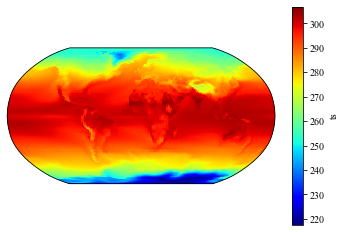

In [70]:
# Refine the lat-lon plot: change projection

# troviamo gli stesi risultati di sopra, ad esempio temperature più basse in antartide

d1.ts.mean(dim='time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')

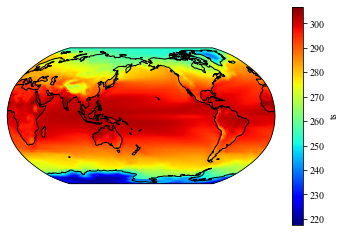

In [71]:
# Refine the lat-lon plot: 
# - explore the options available for each type of projection 
# - add features (e.g. coastline)
# Note how we can define a new graphical object ("p1")

p1 = d1.ts.mean(dim='time').plot(transform=ccrs.PlateCarree(),
                                 subplot_kws={'projection': ccrs.Robinson(central_longitude=180)},   # per fare vedere che si può cambiare la longitudine, mettendo 180 al posto di 0
                                 cmap='jet')
p1.axes.coastlines()  # mettiamo i margini dei continenti

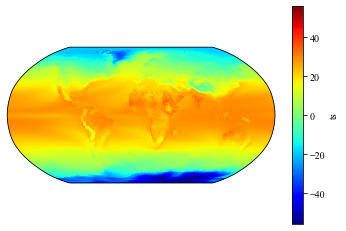

In [72]:
# We can transform our varibale: change of unit from degrees Kelvin to degrees Celsius
# (we store this as a new variable "ts1")

ts1c=ts1-273.15  # mettiamo la stessa cosa i gradi centigradi

ts1c.mean(dim='time').plot(transform=ccrs.PlateCarree(),
                                 subplot_kws={'projection': ccrs.Robinson()}, 
                                 cmap='jet')

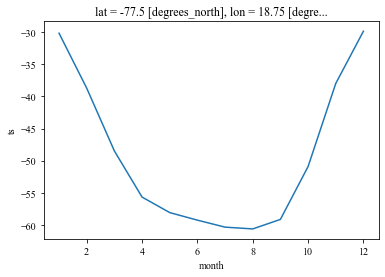

In [73]:
# Explore how to use "groupby" using the labels of xarray objects
# In this case we retrieve the average annual cycle (over the entire period) for a specific grid cell

# guardiamo una serie temporale

# selezioniamo una cella specifica, con indici di lat e long 10,10, e faccio sul tempo un gropup by su base mensile. Voglio calcolare il ciclo annuale medio o climate normals. In questo caso non lo faccio sul periodo di riferimento ma su tutta la durata della simulazione

# vediamo sull'asse x quindi i mesi. si tratta di una zona molto fredda, ci troveremo in antartide.

ts1c.groupby("time.month").mean("time")[:,10,10].plot()

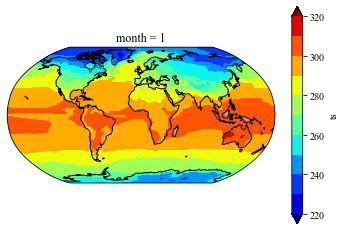

In [74]:
# plottiamo temperatura media per un determinato mese, qui stiamo considerando il mese di gennaio, tutte le lat e long infatti [0,:,:]


# We can plot the average tenperature map for a given month, e.g. January
# We also:
# - Add explicit levels
# - Add controls on the colorbar

p1jan = ts1.groupby("time.month").mean("time")[0,:,:].plot(transform=ccrs.PlateCarree(),
                                 subplot_kws={'projection': ccrs.Robinson()}, 
                                 cmap='jet',levels=[220,230,240,250,260,270,280,290,300,310,320],  # utilizzo dei livelli specifici per la color map
                                 extend="both")
p1jan.axes.coastlines()

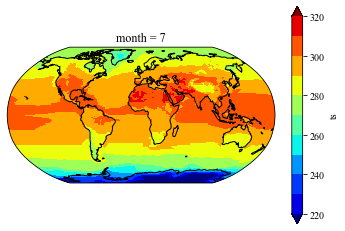

In [75]:
# la stessa cosa la facciamo per il mese di luglio
# vediamo come le stagioni variano in modo alternato nei due emisferi, inverno emisfero nord grafico sopra e inverno emisfero sud in questo grafico

# Now for July
# We can compare the two lon-lat plots with the latitude-time plot above

p1jul = ts1.groupby("time.month").mean("time")[6,:,:].plot(transform=ccrs.PlateCarree(),
                                 subplot_kws={'projection': ccrs.Robinson()}, 
                                 cmap='jet',levels=[220,230,240,250,260,270,280,290,300,310,320],
                                 extend="both")
p1jul.axes.coastlines()

In [76]:
# PLOT NetCDF data": a few details

In [77]:
# Now let's "zoom in" and take a look at 
# - a few details of the grid
# - notable coordinates on the grid: lat=+90/-90, lon=0

# At the same time, we will compare 
# - "plot" 
# - "pcolormesh"
# - "pcontours"

In [78]:
ts1.isel(time=0,lat=slice(0,15))

<xarray.DataArray 'ts' (lat: 15, lon: 192)>
array([[243.86768, 243.86768, 243.86768, ..., 243.86768, 243.86768, 243.86768],
       [244.5398 , 244.57645, 244.57033, ..., 244.51837, 244.52673, 244.53418],
       [245.56061, 245.50777, 245.40869, ..., 245.75723, 245.68332, 245.61275],
       ...,
       [247.15727, 246.3472 , 245.6645 , ..., 250.30212, 249.02632, 248.04329],
       [250.3685 , 249.29965, 248.2771 , ..., 254.19763, 252.75449, 251.5186 ],
       [257.25177, 256.1661 , 254.90303, ..., 259.7683 , 258.90506, 258.10986]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1850-01-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... -75.0 -73.75 -72.5
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-15T03:52:23Z altered by CMOR: replaced missing va...

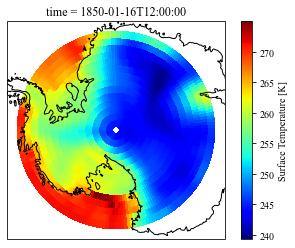

In [79]:
# ci focalizziamo sul polo sud

# Focus on the poles (e.g. South Pole)
# We use "plot"

# faccio slice sulle lat, prendo i primi 15 elementi di lat e tutte le longitidudini
p1a = ts1.isel(time=0,lat=slice(0,15)).plot(transform=ccrs.PlateCarree(),
                subplot_kws={'projection': ccrs.Orthographic(central_longitude=0.0, central_latitude=-90)},
                                                            cmap='jet')
p1a.axes.coastlines()

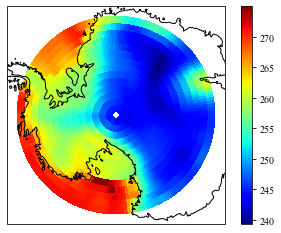

In [80]:
# stessa cosa ma con un modo alternativ usando pcolormesh, al psoto di usare plot

# Focus on the poles (e.g. South Pole)
# We use "pcolormesh"

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.Orthographic(central_longitude=0.0, central_latitude=-90)})

p1b = ax.pcolormesh(d1.lon,d1.lat[:15],ts1.isel(time=0,lat=slice(0,15)),transform=ccrs.PlateCarree(),
                    cmap='jet')
p1b.axes.coastlines()

fig.colorbar(p1b, ax=ax)

# otteniamo la stessa cosa

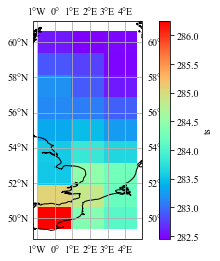

In [81]:
# guardiamo altre zone critiche della griglia


# Focus around the prime meridian passing at Greenwich, UK
# Do you see anything wrong ?

# è un box che contiene le isole britanniche
lon1=-10
lon2=5
lat1=50
lat2=60

p1c = ts1.sel(lon=slice(lon1,lon2),lat=slice(lat1,lat2)).mean('time').plot.pcolormesh(transform=ccrs.PlateCarree(),
                subplot_kws={'projection': ccrs.PlateCarree(central_longitude=0.0)},
                                                            cmap='rainbow')
p1c.axes.coastlines()
p1c.axes.gridlines(draw_labels=True)

# questa mappe però ha un problema con le longitudine, che vanno da 0 a 5, ignorando ciò che è inferiore a 0

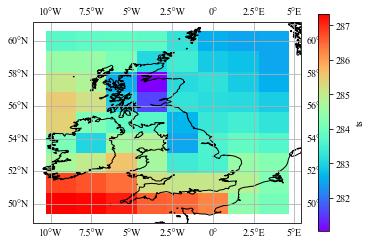

In [82]:
# la soluzione è convertire il sistema di coordinates, infatti le longitudine come avevamo visato anche nei grafici precedenti vanno da 0 a 360.


# Focus around the prime meridian passing at Greenwich, UK
# The problem is that out longiture is defined [0,360]
# We can traspose it to [-180,180]

ts1.coords['lon'] = (ts1.coords['lon'] + 180) % 360 - 180
ts1 = ts1.sortby(ts1.lon)

p1d = ts1.sel(lon=slice(lon1,lon2),lat=slice(lat1,lat2)).mean('time').plot.pcolormesh(transform=ccrs.PlateCarree(),
                subplot_kws={'projection': ccrs.PlateCarree(central_longitude=0.0)},
                                                            cmap='rainbow')
p1d.axes.coastlines()
p1d.axes.gridlines(draw_labels=True)

# ora il box è plottato correttamente e contiene le isole britanniche


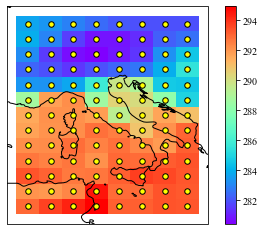

In [83]:
# Now focus on the relation between the grid cells plotted and the coordinates, la relazione tra le celle plottate e le coordinate
# First use "pcolormesh"

# in questo caso consideriamo l'Italia come box

# https://matplotlib.org/devdocs/gallery/images_contours_and_fields/pcolormesh_grids.html

lon1=5
lon2=20
lat1=35
lat2=50

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

p1e = ax.pcolormesh(d1.lon.sel(lon=slice(lon1,lon2)),d1.lat.sel(lat=slice(lat1,lat2)),
                    d1.ts.sel(lon=slice(lon1,lon2),lat=slice(lat1,lat2)).mean('time'),
                    transform=ccrs.PlateCarree(),
                    cmap='rainbow',shading='auto')
ax.coastlines()

xlon, xlat = np.meshgrid(d1.lon.sel(lon=slice(lon1,lon2)), d1.lat.sel(lat=slice(lat1,lat2)))

ax.scatter(xlon, xlat, transform=ccrs.PlateCarree(),marker='o',s=30,c='yellow',edgecolors='black')

fig.colorbar(p1e,ax=ax)

# i punti gialli sono i centoridi delle celle, serve come verifica che stiamo plottando nella maniera corretta

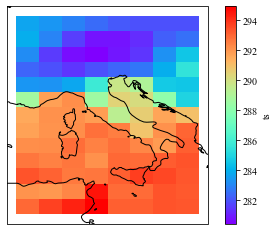

In [84]:
# Second use "plot", a differenza di usare pcolormesh

p1d = d1.ts.sel(lon=slice(5,20),lat=slice(35,50)).mean('time').plot.pcolormesh(transform=ccrs.PlateCarree(),
                subplot_kws={'projection': ccrs.PlateCarree(central_longitude=0.0)},
                                                            cmap='rainbow')
p1d.axes.coastlines()

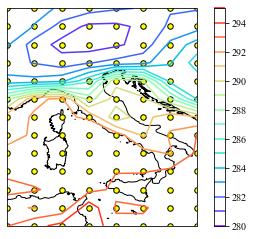

In [85]:
# Third use contours: "contour", ci permette di tracciare queste isoline che hanno una scala di colori

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

p1e = ax.contour(d1.lon.sel(lon=slice(lon1,lon2)),d1.lat.sel(lat=slice(lat1,lat2)),
                    d1.ts.sel(lon=slice(lon1,lon2),lat=slice(lat1,lat2)).mean('time'),
                    transform=ccrs.PlateCarree(),
                    cmap='rainbow',levels=15)
ax.coastlines()

xlon, xlat = np.meshgrid(d1.lon.sel(lon=slice(lon1,lon2)), d1.lat.sel(lat=slice(lat1,lat2)))

ax.scatter(xlon, xlat, transform=ccrs.PlateCarree(),marker='o',s=30,c='yellow',edgecolors='black')

fig.colorbar(p1e,ax=ax)

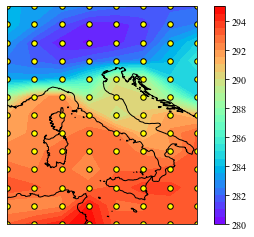

In [86]:
# Fourth use filled contours: "contourf", stessa cosa di sopra ma riempiendo con colori
# sono tutti diversi modi per rappresentare questi campi

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

p1e = ax.contourf(d1.lon.sel(lon=slice(lon1,lon2)),d1.lat.sel(lat=slice(lat1,lat2)),
                    d1.ts.sel(lon=slice(lon1,lon2),lat=slice(lat1,lat2)).mean('time'),
                    transform=ccrs.PlateCarree(),
                    cmap='rainbow',levels=30)
ax.coastlines()

xlon, xlat = np.meshgrid(d1.lon.sel(lon=slice(lon1,lon2)), d1.lat.sel(lat=slice(lat1,lat2)))

ax.scatter(xlon, xlat, transform=ccrs.PlateCarree(),marker='o',s=30,c='yellow',edgecolors='black')

fig.colorbar(p1e,ax=ax)

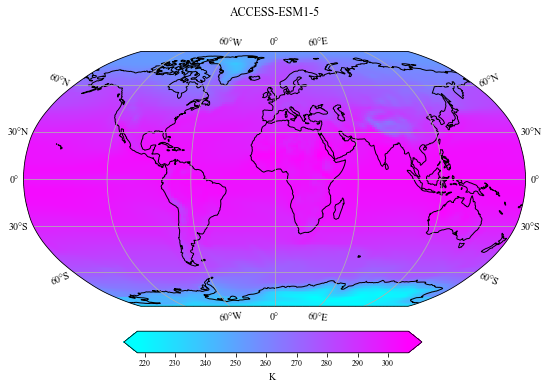

In [87]:
# Now that we have seen a few caveats, let's improve a bit more our plot
# For example we use "pcolrmesh" here

# plottiamo la media di tutte le temperature nel tempo, è un'altra dimostrazione per plottare queste mappe customizzandole un po

fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.Robinson())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.pcolormesh(ts1.lon, ts1.lat, ts1.mean(axis=0), \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.cool )  

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label(ts1.units)
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

# Esplorazione altri file NetCDF

In [88]:
# di seguito esploraimo gli altri file a disposizione

In [89]:
# anche per questi file ho dovuto cambiare percorso altrimenti mi dava errori nel codice di lettura
modfile2='C:/Users/loren/Desktop/ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'

d2 = xr.open_dataset(modfile2)
d2


<xarray.Dataset>
Dimensions:      (lat: 143, lon: 144, time: 1980, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    ts           (time, lat, lon) float32 ...
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:33Z
    tracking_id:            hdl:21.14100/3168f5b1-bf0a-4aec-931f-73c9d0034a45
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Sat Dec  1 12:17:27 2018: ncatted -O -a realizati...
    NCO:                    "4.6.0"

In [90]:
modfile3='C:/Users/loren/Desktop/ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc'
d3 = xr.open_dataset(modfile3)
d3


<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2018-11-30T16:15:09Z
    ...                     ...
    variable_id:            ts
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.3.2
    tracking_id:            hdl:21.14100/24645cf7-2812-40bc-a320-cfc906678afe
    NCO:                    netCDF Operators version 4.7.6 (Homepage = http:/...

In [91]:
d3.lon_bnds

<xarray.DataArray 'lon_bnds' (lon: 256, bnds: 2)>
array([[ -0.703125,   0.703125],
       [  0.703125,   2.109375],
       [  2.109375,   3.515625],
       ...,
       [355.078125, 356.484375],
       [356.484375, 357.890625],
       [357.890625, 359.296875]])
Coordinates:
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds

In [92]:
modfile4='C:/Users/loren/Desktop/ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'
d4 = xr.open_dataset(modfile4)
d4

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-02-20T02:26:52Z
    ...                     ...
    title:                  MRI-ESM2-0 output prepared for CMIP6
    variable_id:            ts
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MRI is licensed unde...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/83b81c22-3ba4-45c0-9e9b-3f94038f7cb7

In [93]:
d4.lon_bnds

<xarray.DataArray 'lon_bnds' (lon: 320, bnds: 2)>
array([[ -0.5625,   0.5625],
       [  0.5625,   1.6875],
       [  1.6875,   2.8125],
       ...,
       [356.0625, 357.1875],
       [357.1875, 358.3125],
       [358.3125, 359.4375]])
Coordinates:
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
Dimensions without coordinates: bnds